# Bitcoin Analysis

## Pre processing Data

Data from: https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset

In [45]:
import pandas as pd
import numpy as np
import polars as pl

In [46]:
df = pd.read_csv('data/BitcoinPrice.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df = df.resample('d').agg({'open': 'first', 'close': 'last', 'high': 'max', 'low': 'min', 'volume': 'sum', 'quote_asset_volume': 'sum', 'number_of_trades': 'sum'}).reset_index()
df.dropna(inplace=True)
df.shape

(2176, 8)

In [47]:
df.head()

,timestamp,open,close,high,low,volume,quote_asset_volume,number_of_trades
0,2017-08-17,4261.48,4285.08,4485.39,4200.74,795.150377,3.454770e+06,3427
1,2017-08-18,4285.08,4108.37,4371.52,3938.77,1199.888264,5.086958e+06,5233
2,2017-08-19,4108.37,4139.98,4184.69,3850.00,381.309763,1.549484e+06,2153
3,2017-08-20,4139.98,4086.29,4211.08,4032.62,467.083022,1.930364e+06,2321
4,2017-08-21,4069.13,4016.00,4119.62,3911.79,691.743060,2.797232e+06,3972


In [48]:
df['Var'] = df['close'] - df['open']
df['PerVar'] =  (100 *  df['Var']) / df['open']
df['Result'] = np.where(df['Var'] > 0, 1, 0)
df['Result'] = df['Result'].shift(periods=-1, fill_value=0)

In [49]:
df.head()

,timestamp,open,close,high,low,volume,quote_asset_volume,number_of_trades,Var,PerVar,Result
0,2017-08-17,4261.48,4285.08,4485.39,4200.74,795.150377,3.454770e+06,3427,23.60,0.553798,0
1,2017-08-18,4285.08,4108.37,4371.52,3938.77,1199.888264,5.086958e+06,5233,-176.71,-4.123844,1
2,2017-08-19,4108.37,4139.98,4184.69,3850.00,381.309763,1.549484e+06,2153,31.61,0.769405,0
3,2017-08-20,4139.98,4086.29,4211.08,4032.62,467.083022,1.930364e+06,2321,-53.69,-1.296866,0
4,2017-08-21,4069.13,4016.00,4119.62,3911.79,691.743060,2.797232e+06,3972,-53.13,-1.305685,1


In [50]:
df_pl = pl.from_pandas(df)
#df_pl = df_pl.with_columns(index = pl.int_range(pl.len()))
df_pl = df_pl.with_row_index('index')

In [51]:
df_pl.head()

index,timestamp,open,close,high,low,volume,quote_asset_volume,number_of_trades,Var,PerVar,Result
u32,datetime[ns],f64,f64,f64,f64,f64,f64,i64,f64,f64,i32
0,2017-08-17 00:00:00,4261.48,4285.08,4485.39,4200.74,795.150377,3.4548e6,3427,23.6,0.553798,0
1,2017-08-18 00:00:00,4285.08,4108.37,4371.52,3938.77,1199.888264,5.0870e6,5233,-176.71,-4.123844,1
2,2017-08-19 00:00:00,4108.37,4139.98,4184.69,3850.0,381.309763,1.5495e6,2153,31.61,0.769405,0
3,2017-08-20 00:00:00,4139.98,4086.29,4211.08,4032.62,467.083022,1.9304e6,2321,-53.69,-1.296866,0
4,2017-08-21 00:00:00,4069.13,4016.0,4119.62,3911.79,691.74306,2.7972e6,3972,-53.13,-1.305685,1


In [52]:
df.isna().sum() 

timestamp             0
open                  0
close                 0
high                  0
low                   0
volume                0
quote_asset_volume    0
number_of_trades      0
Var                   0
PerVar                0
Result                0
dtype: int64

In [53]:
s = 0
count = 0
ConsecutiveDays = []
for row in df_pl.rows(named=True):
    if (row['Var'] <= 0 and s > 0) or (row['Var'] > 0 and s <= 0):
        s = 0
    if row['Var'] <= 0:
        s -= 1
    else:
        s += 1
    ConsecutiveDays.append(s)
    count += 1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [54]:
# Convert the list to a Polars DataFrame with an autogenerated 'id' column
df_list = pl.DataFrame({
    'ConsecutiveDays': ConsecutiveDays
}).with_row_index('index')  # Add a row count to serve as the 'id' column

# Join the DataFrames on the autogenerated 'id' column
df_pl = df_pl.join(df_list, on='index')

In [55]:
df_pl.head(10)

index,timestamp,open,close,high,low,volume,quote_asset_volume,number_of_trades,Var,PerVar,Result,ConsecutiveDays
u32,datetime[ns],f64,f64,f64,f64,f64,f64,i64,f64,f64,i32,i64
0,2017-08-17 00:00:00,4261.48,4285.08,4485.39,4200.74,795.150377,3.4548e6,3427,23.6,0.553798,0,1
1,2017-08-18 00:00:00,4285.08,4108.37,4371.52,3938.77,1199.888264,5.0870e6,5233,-176.71,-4.123844,1,-1
2,2017-08-19 00:00:00,4108.37,4139.98,4184.69,3850.0,381.309763,1.5495e6,2153,31.61,0.769405,0,1
3,2017-08-20 00:00:00,4139.98,4086.29,4211.08,4032.62,467.083022,1.9304e6,2321,-53.69,-1.296866,0,-1
4,2017-08-21 00:00:00,4069.13,4016.0,4119.62,3911.79,691.74306,2.7972e6,3972,-53.13,-1.305685,1,-2
5,2017-08-22 00:00:00,4016.0,4040.0,4104.82,3400.0,966.684858,3.7525e6,6494,24.0,0.59761,1,1
6,2017-08-23 00:00:00,4040.0,4114.01,4265.8,4013.89,1001.136565,4.1487e6,8629,74.01,1.831931,1,2
7,2017-08-24 00:00:00,4147.0,4316.01,4371.68,4085.01,787.418753,3.2965e6,6247,169.01,4.075476,0,3
8,2017-08-25 00:00:00,4316.01,4280.68,4453.91,4247.48,573.61274,2.4846e6,6554,-35.33,-0.81858,1,-1


In [56]:
df = df_pl.to_pandas()

In [57]:
df.head()

,index,timestamp,open,close,high,low,volume,quote_asset_volume,number_of_trades,Var,PerVar,Result,ConsecutiveDays
0,0,2017-08-17,4261.48,4285.08,4485.39,4200.74,795.150377,3.454770e+06,3427,23.60,0.553798,0,1
1,1,2017-08-18,4285.08,4108.37,4371.52,3938.77,1199.888264,5.086958e+06,5233,-176.71,-4.123844,1,-1
2,2,2017-08-19,4108.37,4139.98,4184.69,3850.00,381.309763,1.549484e+06,2153,31.61,0.769405,0,1
3,3,2017-08-20,4139.98,4086.29,4211.08,4032.62,467.083022,1.930364e+06,2321,-53.69,-1.296866,0,-1
4,4,2017-08-21,4069.13,4016.00,4119.62,3911.79,691.743060,2.797232e+06,3972,-53.13,-1.305685,1,-2


In [58]:
print(df.info())  # Check for null values and data types
print(df.describe())  # Summary statistics to check for anomalies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               2176 non-null   uint32        
 1   timestamp           2176 non-null   datetime64[ns]
 2   open                2176 non-null   float64       
 3   close               2176 non-null   float64       
 4   high                2176 non-null   float64       
 5   low                 2176 non-null   float64       
 6   volume              2176 non-null   float64       
 7   quote_asset_volume  2176 non-null   float64       
 8   number_of_trades    2176 non-null   int64         
 9   Var                 2176 non-null   float64       
 10  PerVar              2176 non-null   float64       
 11  Result              2176 non-null   int32         
 12  ConsecutiveDays     2176 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int32(1), int6

## Building Machine Learning Model

### Simple

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [60]:
X = df['ConsecutiveDays'].values.reshape(-1, 1)
y = df['Result'].values.reshape(-1, 1)

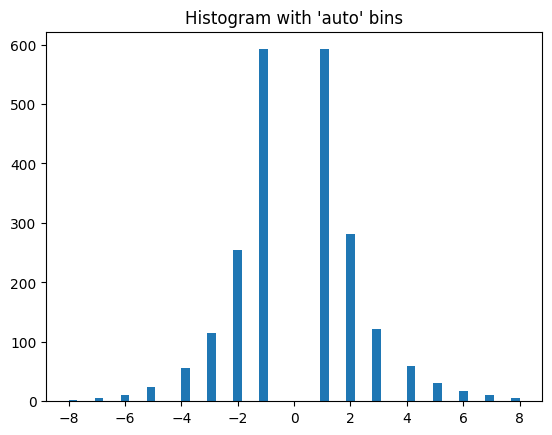

In [61]:
plt.hist(X, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [62]:
# Feature scaling (important for k-NN, SVM, and Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train.ravel(), cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.2f} accuracy with a standard deviation of {scores.std():.2f}")

# Example of training and evaluating the best model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train.ravel())
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred.ravel()))

Logistic Regression: 0.54 accuracy with a standard deviation of 0.03
Random Forest: 0.53 accuracy with a standard deviation of 0.03
Naive Bayes: 0.54 accuracy with a standard deviation of 0.02
k-Nearest Neighbors: 0.51 accuracy with a standard deviation of 0.01
Decision Tree: 0.53 accuracy with a standard deviation of 0.03
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       204
           1       0.58      0.55      0.56       232

    accuracy                           0.55       436
   macro avg       0.55      0.55      0.55       436
weighted avg       0.55      0.55      0.55       436



### Complex

In [64]:
df.columns

Index(['index', 'timestamp', 'open', 'close', 'high', 'low', 'volume',
       'quote_asset_volume', 'number_of_trades', 'Var', 'PerVar', 'Result',
       'ConsecutiveDays'],
      dtype='object')

In [65]:
X = df.drop(['Result', 'timestamp', 'index', 'high', 'low', 'quote_asset_volume', 'open', 'PerVar', 'close'], axis=1)
y = df['Result'].values.reshape(-1, 1)

In [66]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1500),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train.ravel(), cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.2f} accuracy with a standard deviation of {scores.std():.2f}")

# Example of training and evaluating the best model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train.ravel())
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred.ravel()))

Logistic Regression: 0.53 accuracy with a standard deviation of 0.02
Random Forest: 0.49 accuracy with a standard deviation of 0.02
Naive Bayes: 0.52 accuracy with a standard deviation of 0.01
k-Nearest Neighbors: 0.50 accuracy with a standard deviation of 0.01
Decision Tree: 0.49 accuracy with a standard deviation of 0.04
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       204
           1       0.56      0.55      0.55       232

    accuracy                           0.53       436
   macro avg       0.53      0.53      0.53       436
weighted avg       0.53      0.53      0.53       436



## Traditional Approach

In [67]:
# Define the range for the keys
start = df['ConsecutiveDays'].min()
end = df['ConsecutiveDays'].max()

# Generate the dictionary with keys as strings of numbers and empty lists as values
counting = {str(i): [0, 0] for i in range(start, end + 1)}

print(counting)

{'-8': [0, 0], '-7': [0, 0], '-6': [0, 0], '-5': [0, 0], '-4': [0, 0], '-3': [0, 0], '-2': [0, 0], '-1': [0, 0], '0': [0, 0], '1': [0, 0], '2': [0, 0], '3': [0, 0], '4': [0, 0], '5': [0, 0], '6': [0, 0], '7': [0, 0], '8': [0, 0]}


In [68]:
count_zeros = []
count_ones = []
for row in df_pl.rows(named=True):
    if row['Result'] == 0:
        counting[str(row['ConsecutiveDays'])][0] += 1
    else:
        counting[str(row['ConsecutiveDays'])][1] += 1
print(counting)

{'-8': [0, 2], '-7': [2, 4], '-6': [6, 4], '-5': [10, 14], '-4': [24, 32], '-3': [57, 58], '-2': [115, 139], '-1': [254, 338], '0': [0, 0], '1': [310, 282], '2': [161, 121], '3': [62, 59], '4': [28, 31], '5': [14, 17], '6': [7, 10], '7': [5, 5], '8': [5, 0]}
